<img src="Data/logo_lapage_small.png" />

# <u> Analyse du CA</u>

# Sommaire

* [Importation des librairies et des fichiers](#chapter1)
* [Création d'une fonction Lorenz()](#chapter2)
* [Analyse du CA](#chapter3)
    * [Calcul du CA](#section3_1)
    * [Calcul du CA par catégorie](#section3_2)
    * [Calcul du CA dans le temps](#section3_3)
        * [Calcul du CA journalier](#section3_3_1)
        * [Calcul du CA bimensuel](#section3_3_2)
    * [Evolution du CA selon la catégorie](#section3_4)
        * [Octobre 2021](#section3_4_1)
    * [Etude du CA par client](#section3_5)
        * [clients BtoC](#section3_5_1)
        * [clients très fidèles](#section3_5_2)
    * [Etude du CA par produit](#section3_6)
        * [Analyse sur les produits](#section3_6_1)
    * [Etude du CA selon l'âge](#section3_7)
    * [Etude des clients BtoB](#section3_8)
    

# Importation des librairies et des fichiers <a class="anchor" id="chapter1"></a>

Pour cette étude, nous allons utiliser les librairies Pandas pour la gestion des dataframes, Matplotlib et Seaborn pour la création de graphes, Numpy pour les calculs et Scipy pour les statistiques.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats as st
# non-affichage des messages d'avertissement
from warnings import filterwarnings
filterwarnings('ignore')

Nous importons aussi le fichier créer dans la partie préparatoire.

In [2]:
lapage_df = pd.read_csv("Data/lapage_df.csv")

In [3]:
lapage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679332 entries, 0 to 679331
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_prod        679332 non-null  object 
 1   price          679332 non-null  float64
 2   categ          679332 non-null  int64  
 3   date           679332 non-null  object 
 4   session_id     679332 non-null  object 
 5   client_id      679332 non-null  object 
 6   sex            679332 non-null  object 
 7   age            679332 non-null  int64  
 8   Tranche d'age  679332 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 46.6+ MB


Nous remarquons que la colonne "date" n'est plus dans le bon format, nous changeons également le type de la colonne "catégorie" car elle représente une variable qualitative.

In [4]:
# changement de types
lapage_df.date = pd.to_datetime(lapage_df.date)
lapage_df.categ = lapage_df.categ.astype(str)

***
***

# Création d'une fonction lorenz() <a class="anchor" id="chapter2"></a>

Cette fonction donne la courbe de Lorenz pour un dataframe résultant de l'aggrégation du dataframe initial selon les paramètres suivants :<br> -  colonne : sommes des occurences de la variable étudiée, classées dans l'ordre croissant <br>-  index : variable de comparaison<br>Cette fonction donne aussi l'indice de gini et la valeur médiale.

<div class="alert alert-block alert-info">
    création du df pour utiliser cette fct :<br>
    df = pd.DataFrame(df_de_référence.groupby("colonne_A")["colonne_B"].sum())<br>
    df = df.sort_values("colonne_B")
</div>

In [5]:
def lorenz(df):
    n = len(df)
    lorenz = df.iloc[:,0].cumsum() /df.iloc[:,0].sum()
    lorenz = np.append([0], lorenz)
    xaxis = np.linspace(0-1/n,1+1/n,len(lorenz))
    # calcul de l'indice de Gini
    S = 0.5 - (lorenz.sum() - lorenz[-1]/2 - lorenz[0]/2)/n
    gini = round(2*S,2)
    # calcul de la valeur médiale
    mediale = 0.5*df.iloc[:,0].sum()
    val = len(df.loc[df.iloc[:,0].cumsum()<mediale]) /len(df)
    
    # graphe
    plt.figure(figsize=(10,10))
    plt.plot(xaxis, lorenz, label="courbe de Lorenz")
    plt.plot([0,1], [0,1], 'green', label='Distribution égalitaire')
    plt.vlines(x=val, ymin=0, ymax=.5, color='red', linestyle='--', linewidth=1, label='Médiale')
    plt.hlines(xmin=val, xmax=0, y=.5, color='red', linestyle='--', linewidth=1)
    plt.title("Courbe de Lorenz", fontsize=15, fontweight='bold')
    plt.legend(loc="upper left")
    plt.show()
    
    print("l'indice de gini est de", gini)
   
    print("la valeur médiale est atteinte à", round(val*100,2), "%")

***
***

# Analyse du CA <a class="anchor" id="chapter3"></a>
Dans cette partie, nous allons nous intéresser à l'évolution du Chiffre d'Affaires au cours des 2 dernières années.
## Calcul du CA <a class="anchor" id="section3_1"></a>

In [6]:
#calcul du CA, chaque ligne correspondant à une vente, nous faisons la somme de toutes les lignes sur la colonne price
CA = lapage_df.price.sum()
print("Sur les 2 années d'activité, le chiffre d'affaires s'élève à", round(CA,2),"€")

Sur les 2 années d'activité, le chiffre d'affaires s'élève à 11856321.01 €


## Calcul du CA par catégorie <a class="anchor" id="section3_1"></a>

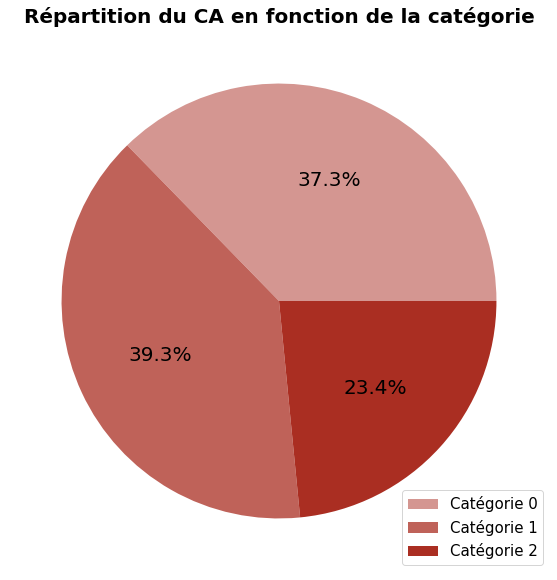

,CA (en €)
categ,
0,4422323.30
1,4653722.69
2,2780275.02


In [7]:
# création du df CA par catégorie
ca_categ_df = pd.DataFrame(lapage_df.groupby("categ")["price"].sum().round(2))
ca_categ_df.rename(columns={"price":"CA (en €)"}, inplace=True)

# éléments de mise en forme
labels=["Catégorie 0", "Catégorie 1", "Catégorie 2"]
colours=["#D49691", "#BF6259", "#AA2E22"]

# représentation graphique sous forme de piechart
plt.figure(figsize=(10,10))
plt.pie(ca_categ_df["CA (en €)"], colors= colours, autopct='%2.1f%%', textprops = {"fontsize":20})
plt.title("Répartition du CA en fonction de la catégorie", fontsize=20, fontweight='bold')
plt.legend(labels, loc="lower right", fontsize=15)
# plt.savefig(r"images\repartition CA")
plt.show()

# affichage des valeurs
ca_categ_df

## Evolution du CA dans le temps<br> <a class="anchor" id="section3_3"></a>
Nous allons étudier cette évolution selon différentes durées, nous classons chaque ligne de notre Dataframe par date croissante

In [8]:
# tri des lignes par date
ca_date_df = lapage_df.sort_values("date")
ca_date_df = ca_date_df[ca_date_df.date < "2023-01-01"]

### Calcul du CA journalier<br> <a class="anchor" id="section3_3_1"></a>
Nous commençons notre analyse par une étude de l'évolution quotidienne du CA. Nous créons donc un dataframe journalier du CA auquel nous rajoutons une colonne "moyenne mobile". Celle-ci nous permettra de lisser les variations

In [9]:
# création du df
ca_jour_df = pd.DataFrame(ca_date_df.groupby(pd.Grouper(key='date', axis=0, freq='D'))["price"].sum())
# calcul de la moyenne mobile sur 5 jours
ca_jour_df["moyenne mobile"] = ca_jour_df.price.rolling(5, center=True).mean()
# changement d'index
ca_jour_df.reset_index(inplace=True)

In [10]:
ca_jour_mean = ca_jour_df.price.mean()
ca_jour_std = ca_jour_df.price.std()
print("Valeur moyenne du CA journalier:", round(ca_jour_mean,2),"€ ±", round(ca_jour_std, 2),"€")

Valeur moyenne du CA journalier: 16217.49 € ± 1893.8 €


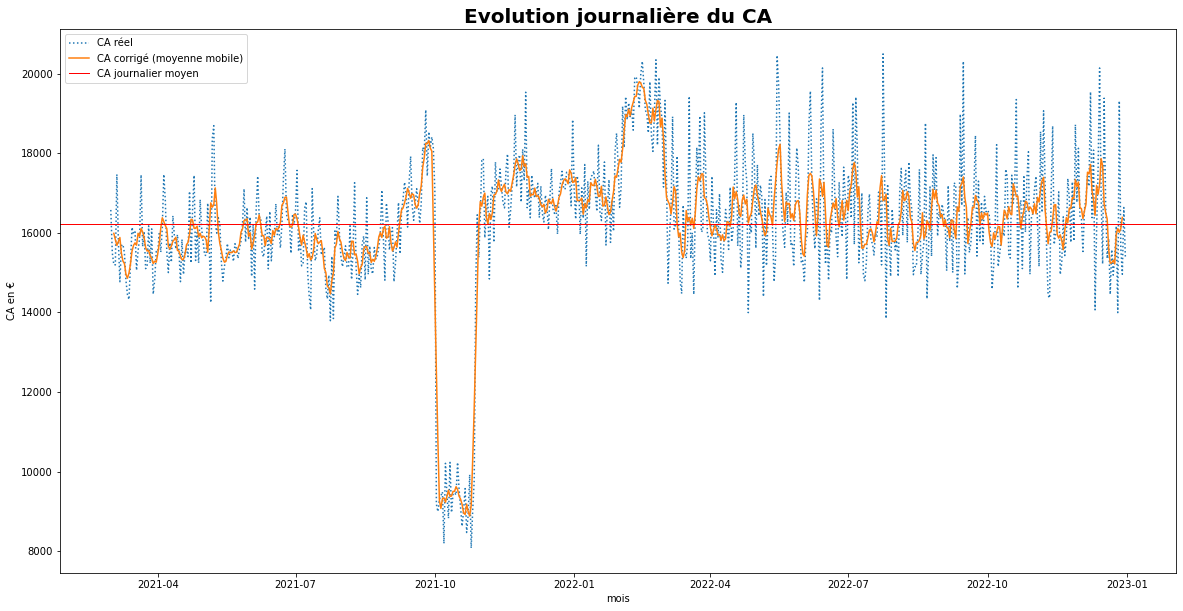

In [11]:
# représentation graphique
plt.figure(figsize=(20,10))
plt.plot("date", "price", ':', data=ca_jour_df, label="CA réel")
plt.plot("date", "moyenne mobile", data=ca_jour_df, label="CA corrigé (moyenne mobile)")
plt.axhline(y=ca_jour_mean, color='r', linewidth=1, label="CA journalier moyen")
plt.title("Evolution journalière du CA", fontsize = 20, fontweight='bold')
plt.legend()
plt.xlabel("mois")
plt.ylabel("CA en €")
plt.show()

### Calcul du CA bimensuel<br> <a class="anchor" id="section3_3_2"></a>
Nous étudions maintenant l'évolution par quinzaine. Cela permet d'avoir une vision plus homogène. Nous avons aussi fait abstraction des chiffres du mois d'octobre 2021, nous reviendrons dessus plus loin.

In [12]:
# regroupement par quinzaine
ca_bimens_df = pd.DataFrame(ca_date_df.groupby(pd.Grouper(key='date', axis=0, freq='14D'))["price"].sum())
ca_bimens_df["cumulé"] = round(ca_bimens_df.price.cumsum(),2)
ca_bimens_df.reset_index(inplace=True)
ca_bimens_df.drop(ca_bimens_df.index[15:18], inplace=True) # suppression des valeurs d'octobre 2021
ca_bimens_df=ca_bimens_df[:-1] # suppression des valeurs de fin février 2023
ca_bimens_df["moyenne mobile"] = ca_bimens_df.price.rolling(3, center=True).mean()

In [13]:
ca_bimens_mean = ca_bimens_df.price.mean()
ca_bimens_std = ca_bimens_df.price.std()
print("Valeur moyenne du CA bimensuel:", round(ca_bimens_mean,2),"€ ±", round(ca_bimens_std, 2),"€")

Valeur moyenne du CA bimensuel: 231075.0 € ± 10871.49 €


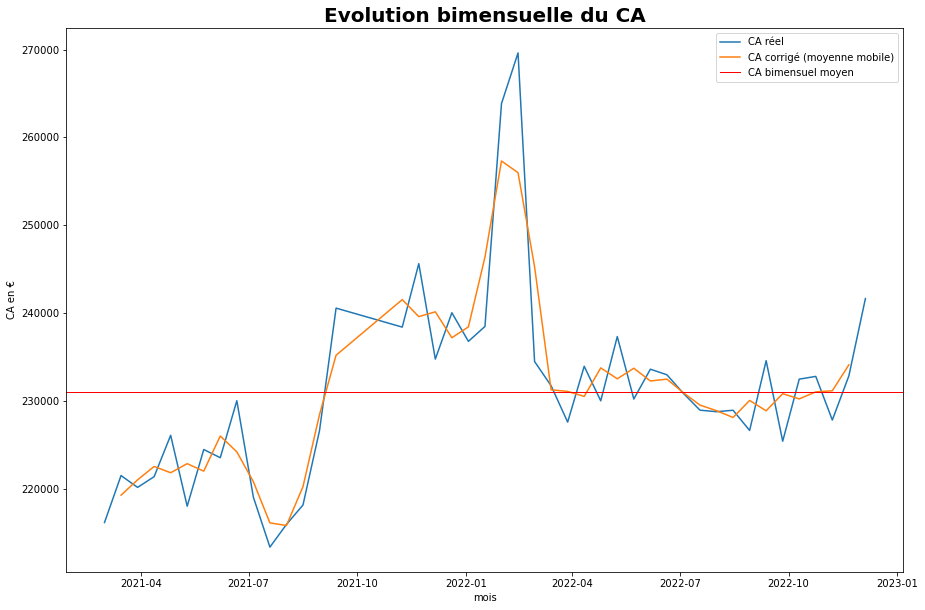

In [14]:
# évolution du CA
plt.figure(figsize=(15,10))
plt.plot("date", "price", data=ca_bimens_df, label="CA réel")
plt.plot("date", "moyenne mobile", data=ca_bimens_df, label="CA corrigé (moyenne mobile)")
plt.axhline(y=ca_bimens_mean, color='r', linewidth=1, label="CA bimensuel moyen")
plt.title("Evolution bimensuelle du CA", fontsize = 20, fontweight='bold')
plt.legend()
plt.xlabel("mois")
plt.ylabel("CA en €")
plt.savefig(r"images\Evolution_bimensuelle")
plt.show();

## Evolution du CA selon la catégorie<br> <a class="anchor" id="section3_4"></a>
Nous créons 3 dataframes à partir du dataframe trié par date, chacun correspondant à une catégorie

In [15]:
lapage0_df=ca_date_df[ca_date_df.categ == "0"]
lapage1_df=ca_date_df[ca_date_df.categ == "1"]
lapage2_df=ca_date_df[ca_date_df.categ == "2"]

In [16]:
lap0_df = pd.DataFrame(lapage0_df.groupby(pd.Grouper(key="date", axis=0, freq="14D"))["price"].sum())
lap0_df.reset_index(inplace=True)

In [17]:
lap1_df = pd.DataFrame(lapage1_df.groupby(pd.Grouper(key="date", axis=0, freq="14D"))["price"].sum())
lap1_df.reset_index(inplace=True)

In [18]:
lap2_df = pd.DataFrame(lapage2_df.groupby(pd.Grouper(key="date", axis=0, freq="14D"))["price"].sum())
lap2_df.reset_index(inplace=True)

In [19]:
# moyenne mobile
lap0_df["moyenne mobile"] = lap0_df.rolling(3, center=True).mean()
lap1_df["moyenne mobile"] = lap1_df.rolling(3, center=True).mean()
lap2_df["moyenne mobile"] = lap2_df.rolling(3, center=True).mean()

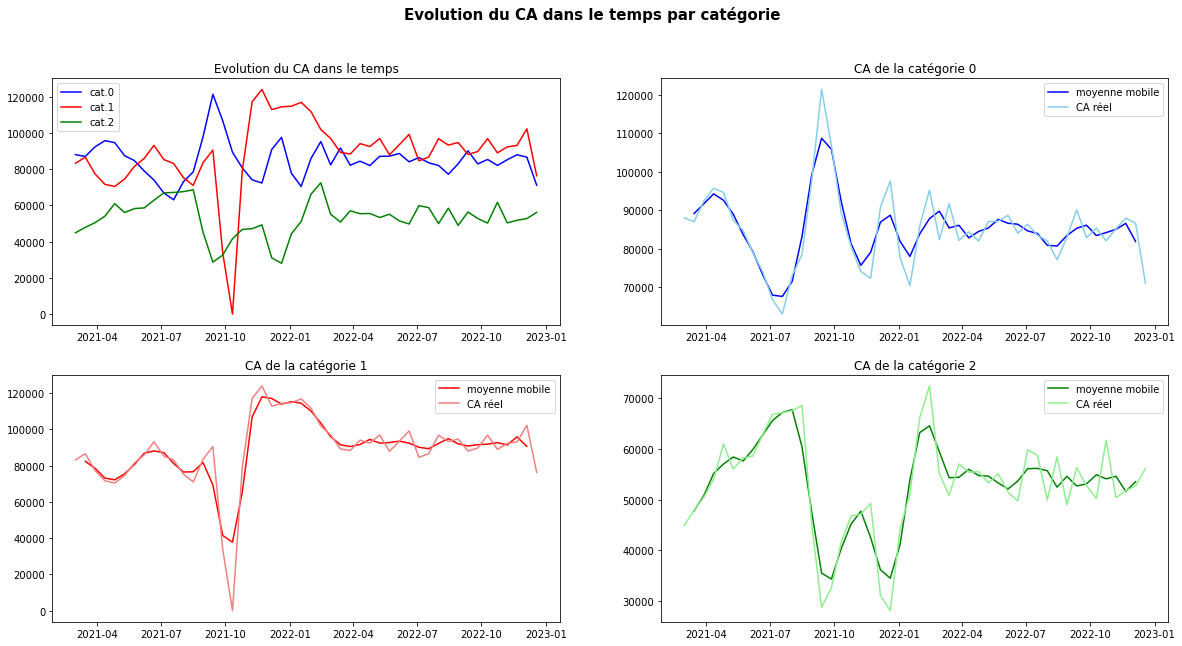

In [20]:
# caractéristiques générales des 4 graphes
plt.figure(figsize=(20,10))
plt.xlabel("mois")
plt.ylabel("CA en €")
plt.suptitle("Evolution du CA dans le temps par catégorie", fontsize = 15, fontweight='bold')
# représentation des 3 catégories 
plt.subplot(2,2,1)
plt.plot("date", "price", data=lap0_df, label="cat.0", color="blue")
plt.plot("date", "price", data=lap1_df, label="cat.1", color="red")
plt.plot("date", "price", data=lap2_df, label="cat.2", color="green")
plt.title("Evolution du CA dans le temps")
plt.legend()
# catégorie 0
plt.subplot(2,2,2)
plt.plot("date", "moyenne mobile", data=lap0_df, color="b", label="moyenne mobile")
plt.plot("date", "price", data=lap0_df, color="skyblue", label="CA réel")
plt.title("CA de la catégorie 0")
plt.legend()
# catégorie 1
plt.subplot(2,2,3)
plt.plot("date", "moyenne mobile", data=lap1_df, color="r", label="moyenne mobile")
plt.plot("date", "price", data=lap1_df, color="lightcoral", label="CA réel")
plt.title("CA de la catégorie 1")
plt.legend()
# catégorie 2
plt.subplot(2,2,4)
plt.plot("date", "moyenne mobile", data=lap2_df, color="g", label="moyenne mobile")
plt.plot("date", "price", data=lap2_df, color="lightgreen", label="CA réel")
plt.title("CA de la catégorie 2")
plt.legend()

plt.show()

### Etude du mois d'octobre 2021<br> <a class="anchor" id="section3_4_1"></a>
Nous avons observé une forte baisse du CA en octobre 2021 (~180k€)

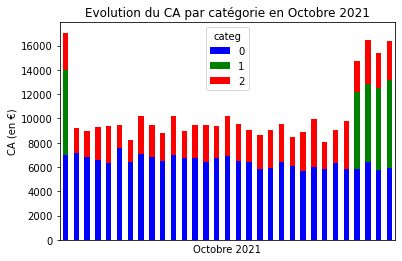

In [21]:
oct2021_df = lapage_df[(lapage_df.date >= "2021-10-01") & (lapage_df.date < "2021-11-01")].pivot_table(index="date", columns="categ", values="price", aggfunc="sum")
fig = oct2021_df.plot.bar(stacked=True, color={"blue", "red", "green"})
fig.set_xticks([])
plt.xlabel("Octobre 2021")
plt.ylabel("CA (en €)")
plt.title("Evolution du CA par catégorie en Octobre 2021");

La baisse de CA en octobre 2021 s'explique par l'absence de ventes de la catégorie 1 entre le 02 et le 28 octobre. Chaque catégorie est affectée par une baisse de CA vers cette période mais cette baisse est très forte pour la catégorie 1. La valeur nulle montre une perte de données accompagnant cette baisse.<br>Une forte baisse des ventes de catégorie 1 avait déjà lieu fin septembre 2021 :

In [22]:
baisse = (lap1_df.loc[15].price - lap1_df.loc[14].price) * 100 / lap1_df.loc[14].price
print("La baisse de CA fin septembre est de", round(baisse,2), "%")

la baisse de CA fin septembre est de -62.54 %


Etudions celà par l'évolution des numéros de sessions

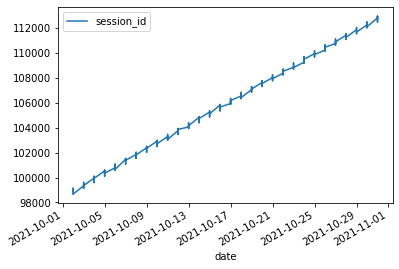

In [23]:
# df du mois d'octobre 2021
oct2021_df = lapage_df[(lapage_df.date > "2021-10-01") & (lapage_df.date < "2021-11-01")]
# transformation des identifiants de session en nombres
oct2021_df["session_id"] = oct2021_df["session_id"].str[2:].astype(int)
# visualisation de l'évolution des identifiants de session au cours du mois d'octobre
oct2021_df.plot (x="date", y="session_id");

Il n'y a pas d'interruption dans les numéros de session, il ne s'agit donc pas d'une perte de données

<AxesSubplot:xlabel='date'>

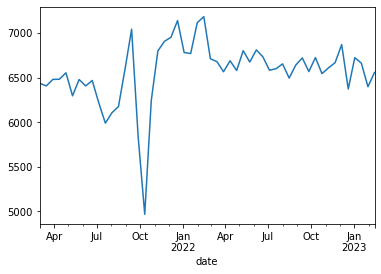

In [24]:
# visualisation de l'évolution du nombre de sessions par quinzaine
sessions = pd.DataFrame(lapage_df.groupby(pd.Grouper(key='date', axis=0, freq='14D'))["session_id"].nunique())
sessions.drop(sessions.index[52], inplace=True)
sessions["session_id"].plot()

Le nombre de sessions a diminué en octobre 2021 confirmant un pb interne. Le graphique montre aussi un nombre constant de sessions. Notre clientèle est fidèle mais nous n'attirons pas de nouveaux clients.

## Etude du CA par client <a class="anchor" id="section3_5"></a>

Dans cette partie, nous allons nous intéresser à l'évolution du CA en fonction de nos clients.

In [25]:
# création du df CA par client
ca_client_df = pd.DataFrame(ca_date_df.groupby("client_id").price.sum())
# classement dans l'ordre croissant
ca_client_df = ca_client_df.sort_values("price")

Représentons la courbe de Lorenz : 

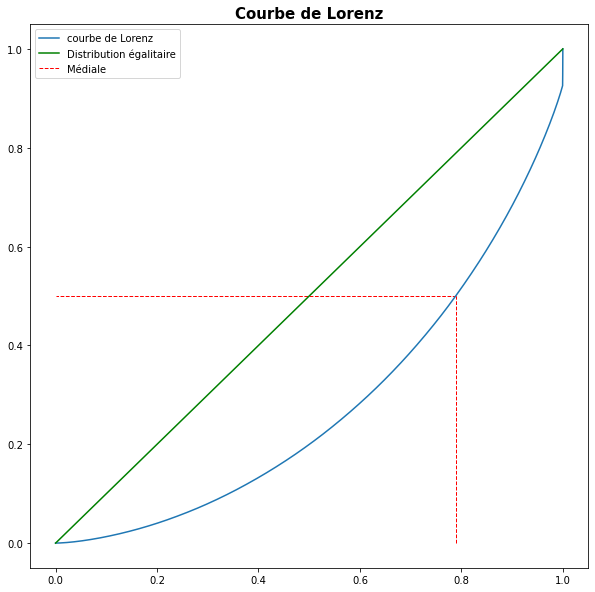

l'indice de gini est de 0.45
la valeur médiale est atteinte à 78.87 %


In [26]:
lorenz(ca_client_df)

L'indice de gini ne révèle pas de grandes inégalités et la valeur médiale suit le principe de Pareto. 21.13% de notre clientèle réalise 50% du CA.

Il semble que plusieurs acheteurs se démarquent des autres :

In [27]:
ca_client_df.tail()

,price
client_id,
c_3263,5025.11
c_3454,103916.41
c_6714,139693.67
c_4958,266768.28
c_1609,299507.38


En effet 4 clients ont des montants d'achats supérieurs à 100k€.

### Etude du CA par client BtoC <a class="anchor" id="section3_5_1"></a>

Intéressons nous à l'impact de ces clients sur notre CA

In [28]:
# df CA par client - 4 acheteurs
ca_btoc_df = ca_client_df.drop(ca_client_df.index[-4:])

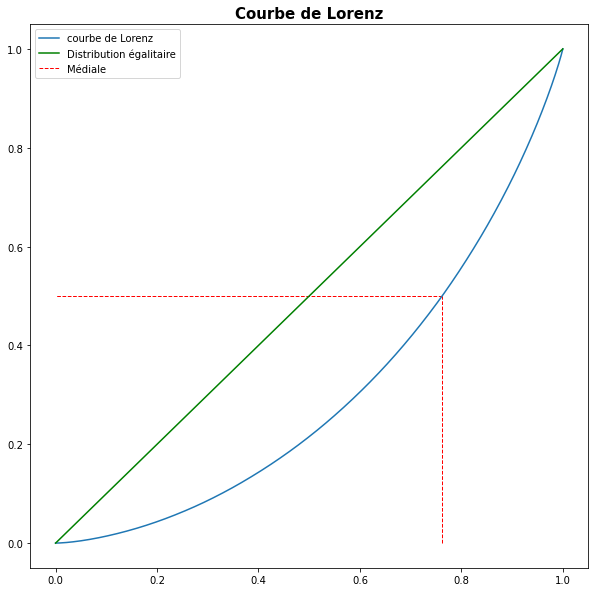

l'indice de gini est de 0.4
la valeur médiale est atteinte à 76.2 %


In [29]:
lorenz(ca_btoc_df)

Les valeurs sont légèrement moins fortes, l'impact de ces clients pro n'est pas significative (3.5% de différence pour la valeur médiale).<br> Il peut être intéressant d'étudier plus en détails les 23.8% de  clients ayant réalisé 50% de notre CA.

### Etude des clients très fidèles <a class="anchor" id="section3_5_2"></a>

In [30]:
# ajoutons une colonne avec le cumul des prix (les clients sont déjà dans l'ordre croissant), et une colonne proportion
ca_btoc_df["cumul"] = ca_btoc_df.price.cumsum()
ca_btoc_df["proportion"] = ca_btoc_df.cumul * 100 / ca_btoc_df.price.sum()

# sélectionnons ceux pour lesquels la valeur médiale est dépassée
ca_btoc_df = ca_btoc_df[ca_btoc_df.proportion >= 50]

# nous importons notre fichier clients et faisons une jointure interne
cust_df = pd.read_csv("customers2.csv")
clients_fideles_df = pd.merge(ca_btoc_df, cust_df, on="client_id", how='inner')
clients_fideles_df = clients_fideles_df.groupby('age', as_index=False).agg({"price":"mean"})

<Figure size 720x720 with 0 Axes>

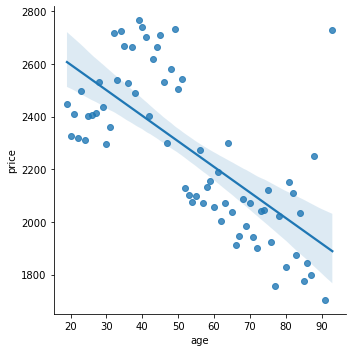

In [31]:
plt.figure(figsize=(10,10))
sns.lmplot(x='age',y='price', data= clients_fideles_df);

Nous observons un large éventail de clients dont 75% à moins de 55 ans. Il y a autant d'hommes que de femmes et ils ont dépensé en moyenne 125€ par mois.

## Etude du CA par produit <a class="anchor" id="section3_6"></a>

In [32]:
# création du df 
ca_produit_df = pd.DataFrame(lapage_df.groupby("id_prod").price.sum())
#classement dans l'ordre croissant
ca_produit_df = ca_produit_df.sort_values("price")

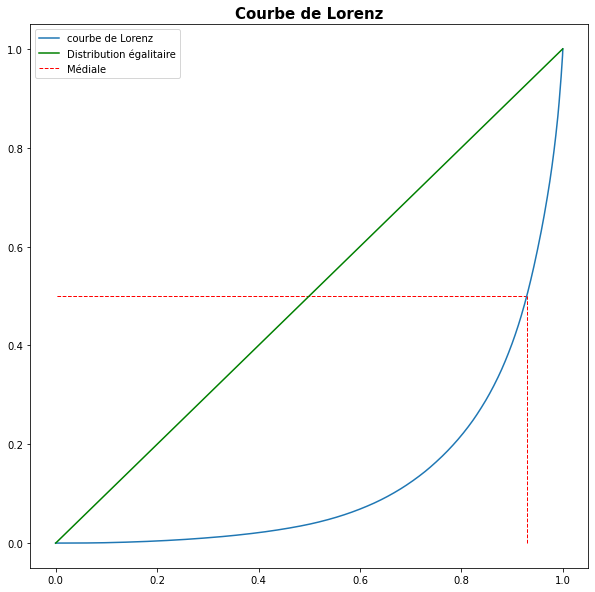

l'indice de gini est de 0.74
la valeur médiale est atteinte à 92.87 %


In [33]:
lorenz(ca_produit_df)

Forte inégalité dans nos produits, étude par catégorie à réaliser<br>
7.13% de nos produits ont réalisé la moitié de notre CA

### Analyse sur les produits <a class="anchor" id="section3_6_1"></a>
Nous allons nous intéresser dans un premier temps aux produits qui se sont le mieux vendus puis à ceux qui ne se sont pas vendus.

In [34]:
# nombre de lignes par identifiant produit = nombre de ventes réalisées
top_df = pd.DataFrame(lapage_df["id_prod"].value_counts())
top_df.rename(columns={"id_prod":"nombre de ventes"}, inplace=True)
top_df.reset_index(inplace=True)
top_df.rename(columns={"index":"id_prod"}, inplace=True)
top_df.head(10)

,id_prod,nombre de ventes
0,1_369,2252
1,1_417,2189
2,1_414,2180
3,1_498,2128
4,1_425,2096
5,1_403,1960
6,1_412,1951
7,1_413,1945
8,1_406,1939
9,1_407,1935


Les plus fortes ventes se font sur les livres de la catégorie 1  (les 50 premiers de cette liste en font partie).<br>Les livres de catégorie 0 sont des livres d'occasion, leur stock n'est donc pas important ou leur réapprovisionnement est fluctuent, les ventes réalisées sont donc moins nombreuses.<br> Ceux de catégorie 2 sont des livres très spécialisés, leur stock est lui aussi limité, les ventes sont faibles mais avec une marge élevée.<br>Une étude par catégorie peut être envisagée en créant des sous-groupes <code>top_df0 = top_df.loc[top_df.id_prod.str.startswith("0_")]</code>

Pour les livres qui se sont le moins bien vendus, nous avions relevé dans la phase préparatoire 21 références sans vente :

In [35]:
# produits sans vente
invendus_df = pd.read_csv('Data/invendus.csv')
invendus_df

,id_prod,price,categ,date,session_id,client_id,sex,age,'Tranche d''age'
0,0_1016,35.06,0,NaN,NaN,NaN,NaN,NaN,NaN
1,0_1780,1.67,0,NaN,NaN,NaN,NaN,NaN,NaN
2,0_1062,20.08,0,NaN,NaN,NaN,NaN,NaN,NaN
3,0_1119,2.99,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0_1014,1.15,0,NaN,NaN,NaN,NaN,NaN,NaN
5,1_0,31.82,1,NaN,NaN,NaN,NaN,NaN,NaN
6,0_1318,20.92,0,NaN,NaN,NaN,NaN,NaN,NaN
7,0_1800,22.05,0,NaN,NaN,NaN,NaN,NaN,NaN
8,0_1645,2.99,0,NaN,NaN,NaN,NaN,NaN,NaN
9,0_322,2.99,0,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
var = int(input("Quel est le nombre de ventes?"))
nb_de_ventes_df = top_df[top_df["nombre de ventes"] == var]
print("Voici les",len(nb_de_ventes_df), "références ayant eu", var, "vente(s) au cours des 2 dernières années")
nb_de_ventes_df

Quel est le nombre de ventes? 2


Voici les 26 références ayant eu 2 vente(s) au cours des 2 dernières années


,id_prod,nombre de ventes
3222,0_1116,2
3223,2_77,2
3224,0_88,2
3225,2_93,2
3226,0_1215,2
3227,0_1533,2
3228,0_898,2
3229,1_402,2
3230,0_495,2
3231,0_1902,2


***
***

## Etude du CA selon l'âge <a class="anchor" id="section3_7"></a>

Pour cette partie, nous allons mettre de côté nos 4 clients BtoB

In [37]:
liste = {"c_4958", "c_3454", "c_6714", "c_1609"}
lapage2_df = lapage_df[~lapage_df.client_id.isin(liste)]

In [38]:
ca_age_df = pd.DataFrame(lapage2_df.groupby("age").price.sum())
ca_age_df = ca_age_df.sort_values("age").reset_index()

# visualisation
plt.figure(figsize=(10,7))
sns.scatterplot(x="age", y="price", data=ca_age_df)
plt.ylabel("CA en €")
plt.title("CA réalisé en fct de l'âge", fontsize=14, fontweight='bold');

In [39]:
ca_age_df

,age,price
0,19,609013.69
1,20,178195.78
2,21,184212.54
3,22,178497.70
4,23,165031.44
...,...,...
71,90,5266.08
72,91,5043.19
73,92,2815.45
74,93,4013.87


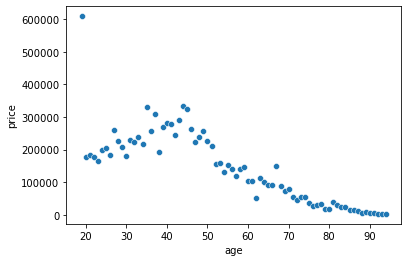

## Etude sur nos clients professionnels <a class="anchor" id="section3_8"></a>
Nous créons un df avec les 4 identifiants clients correspondants :

In [41]:
liste = {"c_4958", "c_3454", "c_6714", "c_1609"}
btob_df = lapage_df[lapage_df.client_id.isin(liste)]
btob_df

,id_prod,price,categ,date,session_id,client_id,sex,age,Tranche d'age
0,0_1421,19.99,0,2022-01-12,s_148474,c_6714,f,55,"(51, 94]"
1,0_1421,19.99,0,2021-09-20,s_92614,c_6714,f,55,"(51, 94]"
2,0_1421,19.99,0,2022-11-10,s_295343,c_6714,f,55,"(51, 94]"
3,0_1421,19.99,0,2021-12-12,s_133316,c_6714,f,55,"(51, 94]"
4,0_1421,19.99,0,2021-04-02,s_14853,c_6714,f,55,"(51, 94]"
...,...,...,...,...,...,...,...,...,...
679115,0_2245,11.73,0,2022-12-05,s_307520,c_6714,f,55,"(51, 94]"
679116,0_2245,11.73,0,2022-07-22,s_241918,c_6714,f,55,"(51, 94]"
679127,0_2245,11.73,0,2021-04-10,s_18560,c_3454,m,54,"(51, 94]"
679128,0_2245,11.73,0,2022-04-10,s_191922,c_3454,m,54,"(51, 94]"


Nous avons la confirmation qu'il s'agit bien de clients pro car un même article peut être achetés plusieurs fois au cours de différentes sessions (comme un libraire pourrait le faire).<br>
Nous pouvons calculer le CA correspondant : 

In [42]:
print("le CA réalisé avec nos 4 clients pro est de:", round(btob_df.price.sum(),2), "€")

le CA réalisé avec nos 4 clients pro est de: 881136.11 €


Nous pouvons étudier quelles sont les achats de ces clients :

In [43]:
# CA & nombre de ventes par client pro 
btob_cat = btob_df.groupby(["client_id", "categ"]).price.agg(['sum', 'count']) # le total de la colonne count donne bien le nb de lignes du df
btob_cat.reset_index(inplace=True)

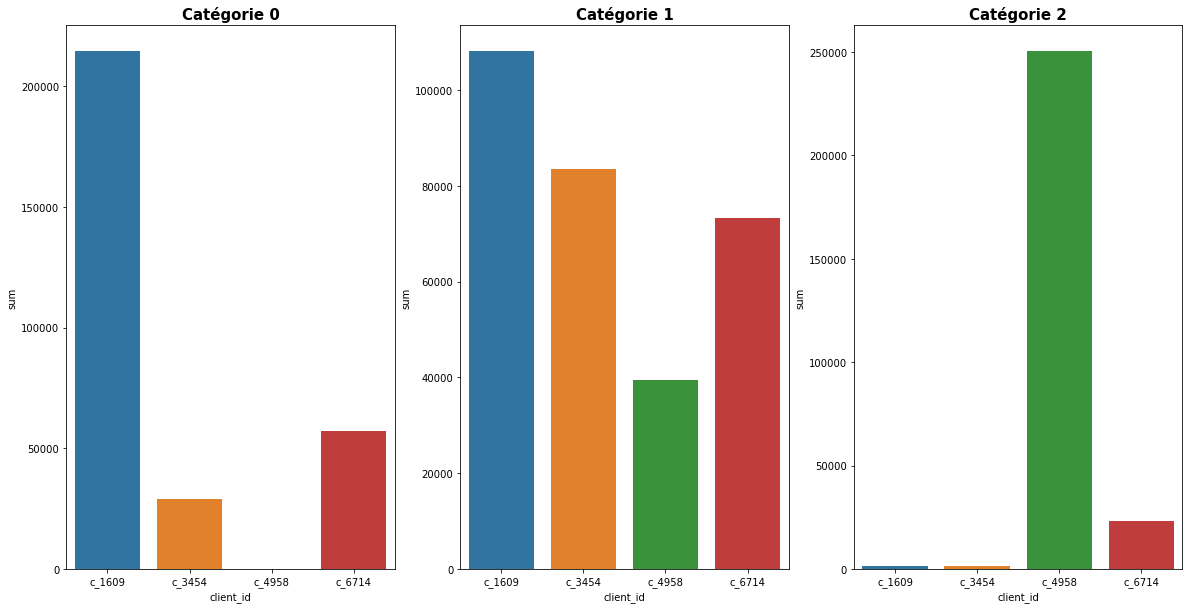

In [44]:

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20, 10))#, sharey=True) pour une visualisation avec le même axe y
plt.title("CA par client pro dans chaque catégorie")

btob_cat0 = btob_cat[btob_cat.categ == "0"]
sns.barplot(x=btob_cat0["client_id"], y=btob_cat0["sum"], ax=ax0)
ax0.set_title("Catégorie 0", fontsize=15, fontweight="bold")

btob_cat1 = btob_cat[btob_cat.categ == "1"]
sns.barplot(x=btob_cat1["client_id"], y=btob_cat1["sum"], ax=ax1)
ax1.set_title("Catégorie 1", fontsize=15, fontweight="bold")

btob_cat2 = btob_cat[btob_cat.categ == "2"]
sns.barplot(x=btob_cat2["client_id"], y=btob_cat2["sum"], ax=ax2)
ax2.set_title("Catégorie 2", fontsize=15, fontweight="bold");